<center>
<h1> Assignment in intro to data neural computation</h1>
<h2> Part C&D </h2>
<h3> By : Michael trushkin </h3>
</center>


## Data

All data Is two dimensional ,  <x,y>   where    -1 <= x, y <= 1.  <br>
The data is all data points <x, y> where x is of the form m/100 where m is an integer between -100 and +100  <br>
and y is of the form  n/100 with n an integer between -100 and +100.

suppose that:
<x,y> has value of 1 iff :  <center>1/2 < x^2+y^2 < 3/4</center>

## About Part C

Try to traing a Neural network using back propogation, to predict the given function.<br>
show the output of each of the neuron's in the network.

### what we will do
* we will build out own neural network class, and implement back prop.


## About the neural network
* we will use mini-batch training, our model supports batches of any sizes.
* we use momentum model meaning the Gradient at time t, is combined with fraction of the gradient of time t-1
* the momentum level is set to 0.5 by default and the learning rate is 0.1 by default.

we use momentum because from some test's i have made it simply converges faster.

In [617]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import myGraphicFuncs
import NeuralNet
importlib.reload(myGraphicFuncs)
importlib.reload(NeuralNet)
from NeuralNet import NeuralNetwork
np.set_printoptions(suppress=True)
import myGraphicFuncs as mg

In [546]:
def f(x, y):
    d = x**2 + y**2
    if 0.5 <= d <= 0.75:
        return 1
    return 0

maxn = 100
maxm = 100

data_set1000 = mg.create_data(f, 1000, maxn, maxm)
data_negative, data_positive = mg.generate_data_all(f, maxn, maxm)
data_uniform1000 = mg.generate_uniform_dataset(f, 1000, data_positive, data_negative)
data_uniform1000[np.random.choice(1000, 5)]
data_all = mg.generate_data_all_noseperation(f, maxn, maxm)

## plot some random uniform data

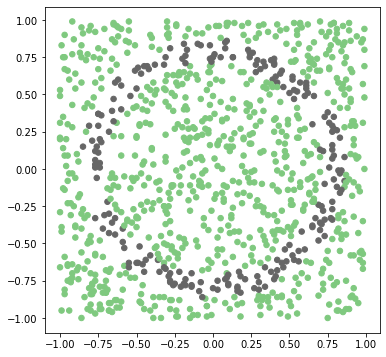

In [547]:
mg.plot_data(data_set1000[:,:2], data_set1000[:,2:])

## plot uniform data a.k.a where there is 50% bad and good examples.

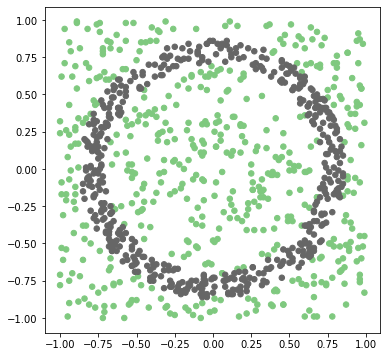

In [548]:
mg.plot_data(data_uniform1000[:,:2], data_uniform1000[:,2:])

## define neural network train and show results
* architecture we will use the \[2, 8, 4, 1\] architecture, as shown in one of the examples.

## try predict few cases without training

In [549]:
net = NeuralNetwork([2, 8, 4, 1])

random_indecies = np.random.choice(1000, 6)

xy = data_uniform1000[random_indecies, :]
x = xy[:, :2]
y = xy[:,2:]


net = NeuralNetwork([2, 8, 4, 1], learning_rate=0.5)
print("prediction initial :\n", net.predict(x))

for i in range(10):
    err = 0
    for j in range(1000):
        err += net.train(x, y)
    print("iter", i, ", error :", err)

print("final :\n", net.predict(x))
print('actual :\n', y)

prediction initial :
 [[0.96475933]
 [0.96374689]
 [0.96217247]
 [0.96494666]
 [0.96291842]
 [0.96439052]]
iter 0 , error : 75.76102959144738
iter 1 , error : 0.8814268537571281
iter 2 , error : 0.47146803424626965
iter 3 , error : 0.32794285629842507
iter 4 , error : 0.2524372455032596
iter 5 , error : 0.20567276854382796
iter 6 , error : 0.17379925553531914
iter 7 , error : 0.15065154382558807
iter 8 , error : 0.133061773109207
iter 9 , error : 0.11923308494938983
final :
 [[0.01693262]
 [0.99449461]
 [0.99330645]
 [0.00417992]
 [0.99542347]
 [0.98328541]]
actual :
 [[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]]


## Above we can see that the error of the neural network on 6 data-point indeed falling.
* that just demonstration that the back-propogation i have implemented is working

### Not lets try the real deal!

### a function that will train the network on some data, in mini batches
* also save the network state at each iteration ( weights, biases )

In [613]:
def train_net(_net : NeuralNetwork, _x, _y, iterations, batch_size, epsilone = 1, log = True):
    net_at_time_t = {}
    _size = _x.shape[0]
    indecies_t = np.random.choice(_size, 6)
    partition = int(_size / batch_size)

    inner_iters = 250
    for i in range(iterations):
        err = 0
        for k in range(inner_iters):
            permutation = np.random.permutation(_size)
            #print(batch)
            for j in range(partition):
                batch = permutation[batch_size * j : batch_size * (j + 1)]
                bx = _x[batch, :]
                by = _y[batch, :]
                r = _net.train(bx, by)
                err += r
                # print(r)
        err /= iterations * inner_iters
        err *= _size
        if(log):
            print("net error per 1000 data :",_net.err1000, "net alpha :", _net.alpha)
            print("iter", i, ", error :", err)

            net_at_time_t[i] = _net.copy()
        if(err < epsilone):
            print("hit error below epsiline breaking out")
            break
    return net_at_time_t
    # print(indecies_t)
    # print(_x[indecies_t, :])

In [614]:
x = data_uniform1000[:, :2]
y = data_uniform1000[:, 2:]

# # x = data_set1000[:, :2]
# # y = data_set1000[:, 2:]

net = NeuralNetwork([2, 8, 4, 1], learning_rate=0.2)
nets = train_net(net, x, y, 26, 32, 0.1)

net error per 1000 data : 252.0703165150371 net alpha : 0.17677669529663687
iter 0 , error : 300.5035474893859
net error per 1000 data : 242.19898998126308 net alpha : 0.17677669529663687
iter 1 , error : 297.56344015181685
net error per 1000 data : 218.35429662828835 net alpha : 0.17677669529663687
iter 2 , error : 269.82782141098374
net error per 1000 data : 164.3755194333663 net alpha : 0.17677669529663687
iter 3 , error : 238.77268718168696
net error per 1000 data : 61.990505671160435 net alpha : 0.17677669529663687
iter 4 , error : 136.4793129215109
net error per 1000 data : 36.89072554165596 net alpha : 0.17677669529663687
iter 5 , error : 53.74667891407533
net error per 1000 data : 21.6946017061091 net alpha : 0.1655806332134906
iter 6 , error : 30.955701685741733
net error per 1000 data : 18.812892735405732 net alpha : 0.1619210685708042
iter 7 , error : 25.831484745605962
net error per 1000 data : 20.79058788572291 net alpha : 0.16447678025617757
iter 8 , error : 23.1828273313

## Ploting the networks prediction on the full data every 5th iteration
* Note : the network trains on a closed training set with 1000 examples. <br>
  while we plot based on the 40k possible points <br>
  ( we skip over few to plot it nicely )

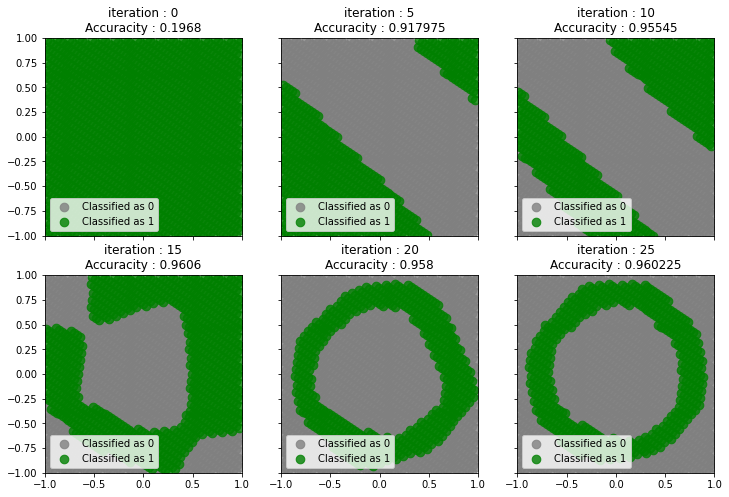

In [632]:
i = 1
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,8))

all_x = data_all[:, :2]
all_y = data_all[:, 2:]
# plot_test(axs[0][0], test_results[0])
for i in range(6):
    j = i % 3
    k = int(i / 3)
    iteration = i * 5
    accuracity = mg.calculate_accuracity(nets[iteration], all_x, all_y)
    name = "iteration : " + str(iteration) + "\nAccuracity : " + str(accuracity) 
    mg.plot_test(nets[i], all_x[::23], name, axs[k][j], s=75)
plt.show()

## We can clearly see the model is "learning", and generalize well even to the "complete data"
* note that we plot the model predictions given data_points it has never seen before!

In [ ]:
## Train the network a lil bit more

In [606]:
train_net(net, x, y, 26, 32, 0.1, False)
net.err1000

net error per 1000 data : 28.097103336741405 net alpha : 0.17249318404641284
iter 0 , error : 101.07119264314134
net error per 1000 data : 22.055697113627915 net alpha : 0.16601128202167237
iter 1 , error : 97.36568252369713
net error per 1000 data : 29.492073556784714 net alpha : 0.1738286487490337
iter 2 , error : 95.48844046923344
net error per 1000 data : 20.477974873209373 net alpha : 0.16408612240187395
iter 3 , error : 96.48625966396595
net error per 1000 data : 20.86447391053151 net alpha : 0.16456842496715599
iter 4 , error : 96.02622813676639
net error per 1000 data : 23.389206290185882 net alpha : 0.16755432009556476
iter 5 , error : 94.14918935132587
net error per 1000 data : 30.33618164498162 net alpha : 0.17461239006998033
iter 6 , error : 92.57674468268293
net error per 1000 data : 21.99797582599519 net alpha : 0.16594282318827633
iter 7 , error : 94.23676690129746
net error per 1000 data : 21.78653882867588 net alpha : 0.16569082002963856
iter 8 , error : 91.96993111298

{0: <NeuralNet.NeuralNetwork at 0x1d94f6c82e0>,
 1: <NeuralNet.NeuralNetwork at 0x1d9502969a0>,
 2: <NeuralNet.NeuralNetwork at 0x1d951679430>,
 3: <NeuralNet.NeuralNetwork at 0x1d9514cfb20>,
 4: <NeuralNet.NeuralNetwork at 0x1d95050df10>,
 5: <NeuralNet.NeuralNetwork at 0x1d951535520>,
 6: <NeuralNet.NeuralNetwork at 0x1d9513c8a60>,
 7: <NeuralNet.NeuralNetwork at 0x1d9502967c0>,
 8: <NeuralNet.NeuralNetwork at 0x1d9513c8a30>,
 9: <NeuralNet.NeuralNetwork at 0x1d950d8ef10>,
 10: <NeuralNet.NeuralNetwork at 0x1d950372b50>,
 11: <NeuralNet.NeuralNetwork at 0x1d95150ddf0>,
 12: <NeuralNet.NeuralNetwork at 0x1d951364f70>,
 13: <NeuralNet.NeuralNetwork at 0x1d95151c850>,
 14: <NeuralNet.NeuralNetwork at 0x1d95050da00>,
 15: <NeuralNet.NeuralNetwork at 0x1d94f6ddb80>,
 16: <NeuralNet.NeuralNetwork at 0x1d94f6dd490>,
 17: <NeuralNet.NeuralNetwork at 0x1d9513c88e0>,
 18: <NeuralNet.NeuralNetwork at 0x1d9511eda30>,
 19: <NeuralNet.NeuralNetwork at 0x1d94f6c8b50>,
 20: <NeuralNet.NeuralNetwork 

<AxesSubplot:title={'center':'after'}>

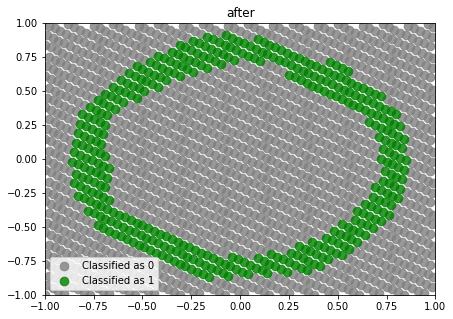

In [619]:
mg.plot_test(net, all_x[::23], "after", s=75)

0.917975